In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
df=pd.read_csv('train_auto.csv')

In [3]:
df

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,10297,0,0.0,0,35.0,0,11.0,"$43,112",No,$0,z_No,M,z_High School,z_Blue Collar,51,Commercial,"$27,330",10,Panel Truck,yes,$0,0,No,0,8.0,z_Highly Rural/ Rural
8157,10298,0,0.0,1,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,PhD,Manager,21,Private,"$13,270",15,Minivan,no,$0,0,No,2,17.0,Highly Urban/ Urban
8158,10299,0,0.0,0,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,Masters,NaN,36,Commercial,"$24,490",6,Panel Truck,no,$0,0,No,0,1.0,Highly Urban/ Urban
8159,10301,0,0.0,0,50.0,0,7.0,"$43,445",No,"$149,248",Yes,z_F,Bachelors,Home Maker,36,Private,"$22,550",6,Minivan,no,$0,0,No,0,11.0,Highly Urban/ Urban


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In the above table, we can see the types of each feature and the corresponding number of non-null values

In [5]:
# numerical features
num_features = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
                'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM',
                'CLM_FREQ', 'MVR_PTS', 'CAR_AGE']
#categorical features
cat_features = ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB',
                'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']

# categorical features with more than two values
multi_cat_features = ['EDUCATION', 'JOB', 'CAR_TYPE']
#binary features
binary_features = list(set(cat_features)-set(multi_cat_features))

#Total features
features = num_features + cat_features

# We transform the features in obj_columns from string to float
obj_columns = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']
def str_to_mun(string):
    if type(string)==str:
        return float(string.replace('$','').replace(',',''))
    else:
        return string

for col in obj_columns:
    df[col] = df[col].apply(str_to_mun)
    

#We rename the value '<High School' in df
df.replace(to_replace='<High School', value='High School plus', inplace=True)

The data is imbalanced, we have 6000 rows with target=0 and 2000 rows with target=1

Later we will apply SMOTE oversampling in the train set, we can't apply SMOTE in the total df to avoid overfitting

<AxesSubplot:>

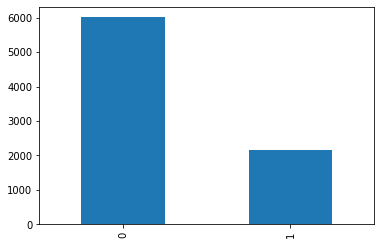

In [6]:
df['TARGET_FLAG'].value_counts().plot.bar()

We visualize the distribution of TARGET_AMT, we notive that there is some outliers in the target, we can filter them before applying regression models.

<AxesSubplot:>

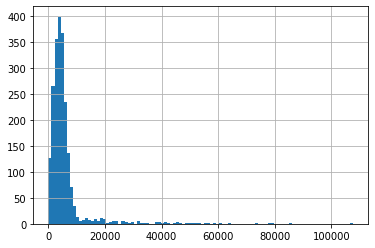

In [7]:
df[df['TARGET_FLAG']==1]['TARGET_AMT'].hist(bins=100)

In [8]:
df[(df['TARGET_FLAG']==1)]['TARGET_AMT'].quantile(q=0.95)

16725.831427599984

In [9]:
df['TARGET_FLAG_']=df['TARGET_AMT'].apply(lambda x: 0 if x<=10000 else 1)

We can use TARGET_FLAG_ to train a model that predict if the output is an outlier

# TARGET_FLAG classification

We plot pairplots to see if the pair features can distinct visually the two classes

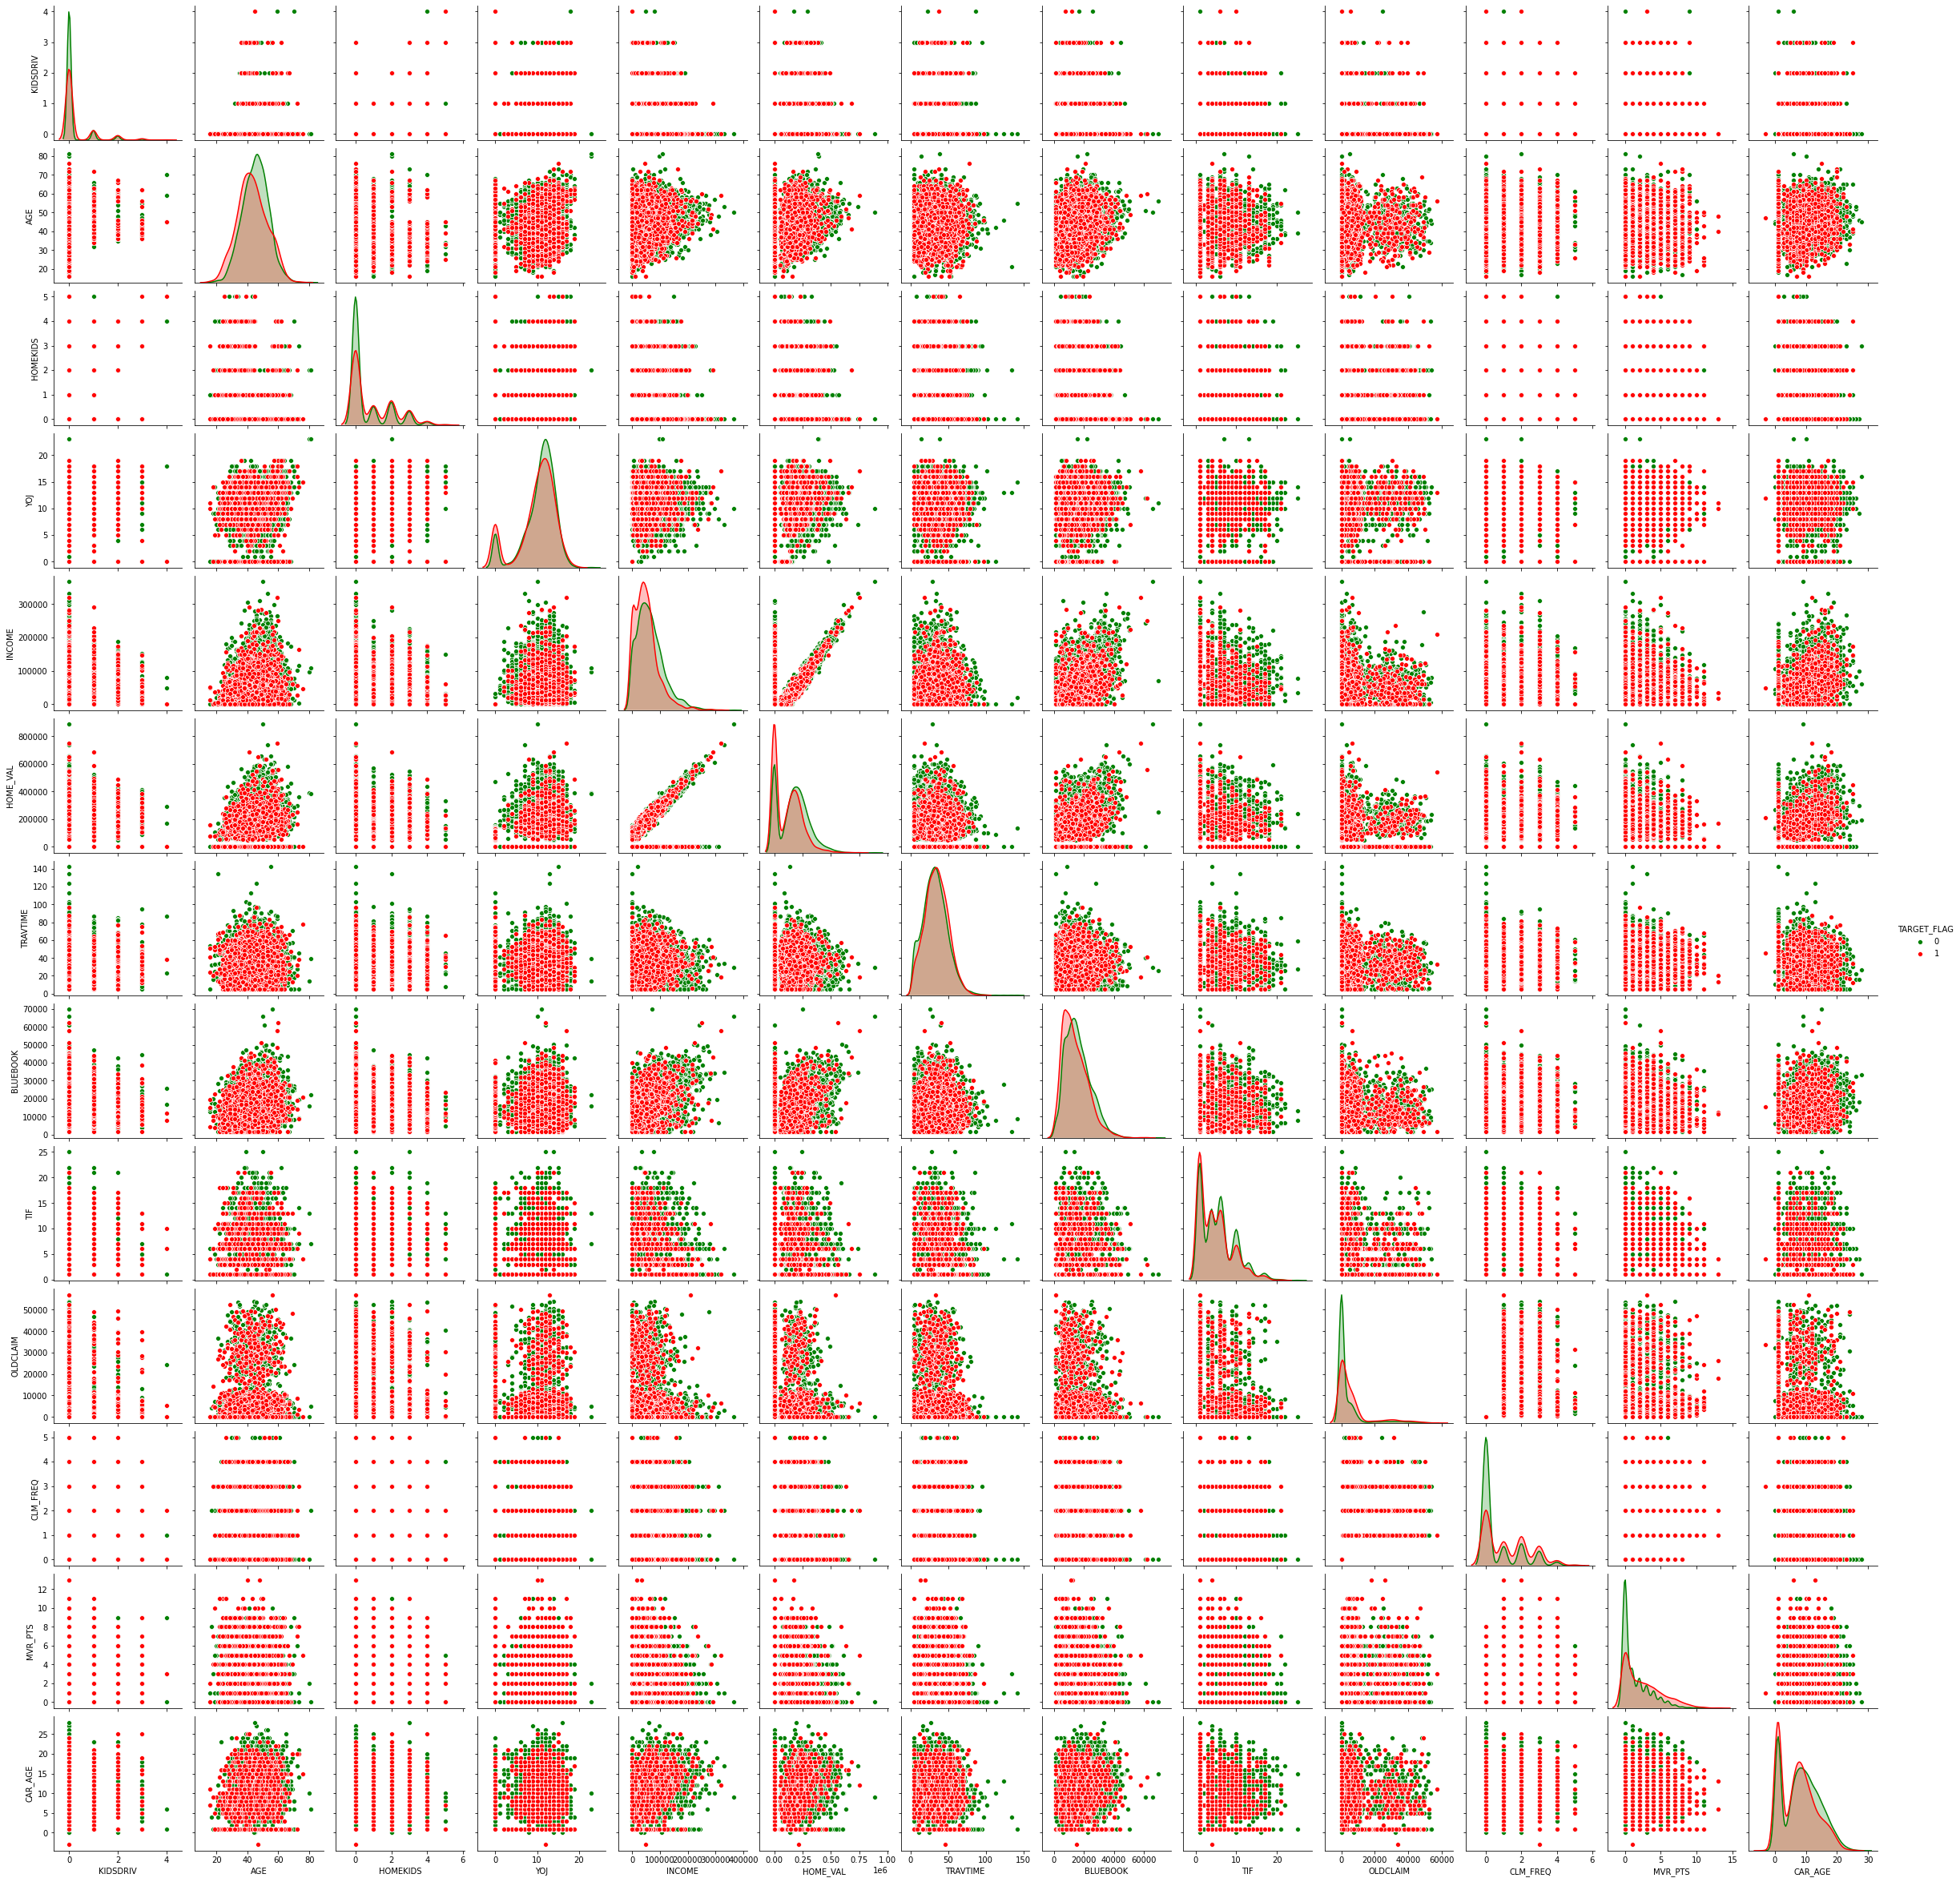

In [10]:
sns.pairplot(df[num_features+['TARGET_FLAG']], hue='TARGET_FLAG', palette=['green', 'red'])

There is no clear distinction of the two classes from the previous plot. We use then boxplots to see the difference between the two distributions:

In [13]:
from statsmodels.graphics.mosaicplot import mosaic

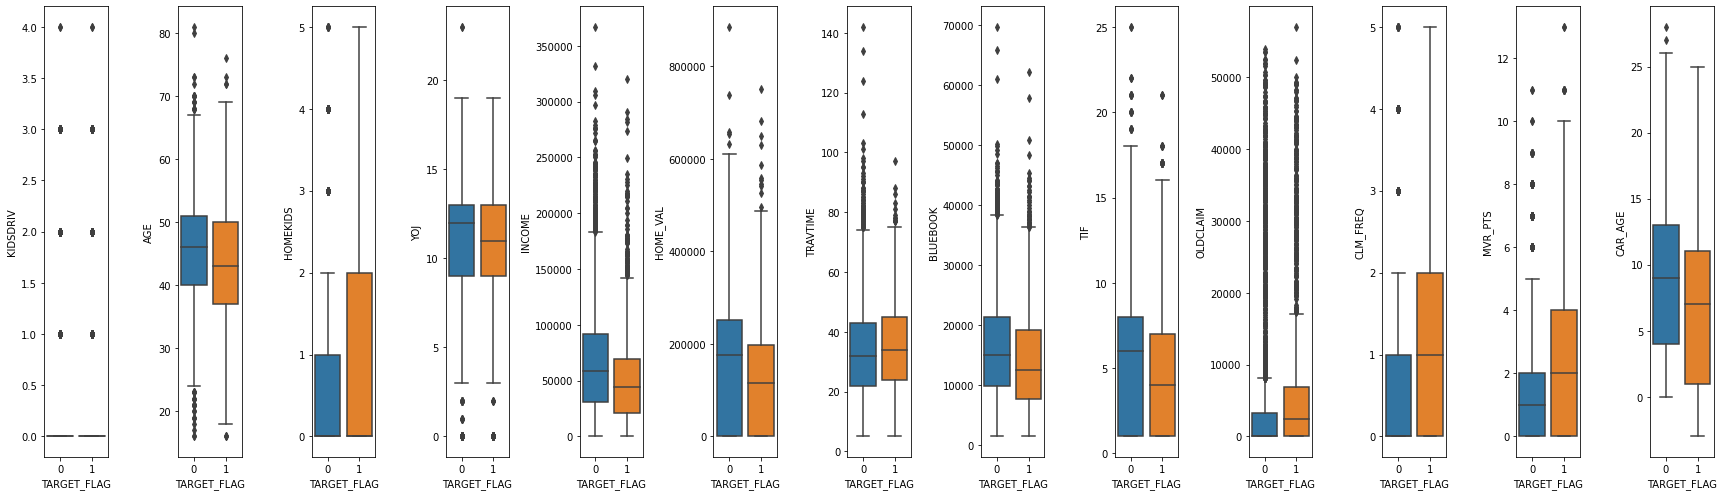

In [14]:
fig, axes = plt.subplots(1,13, figsize=(24, 7))

for name, ax in zip(num_features, axes.flatten()):
    sns.boxplot(y=name, x= "TARGET_FLAG", data=df, orient='v', ax=ax)
    
plt.tight_layout()

We will investigate the impact of th categorical features on the TARGET_FLAG with mosaic plots

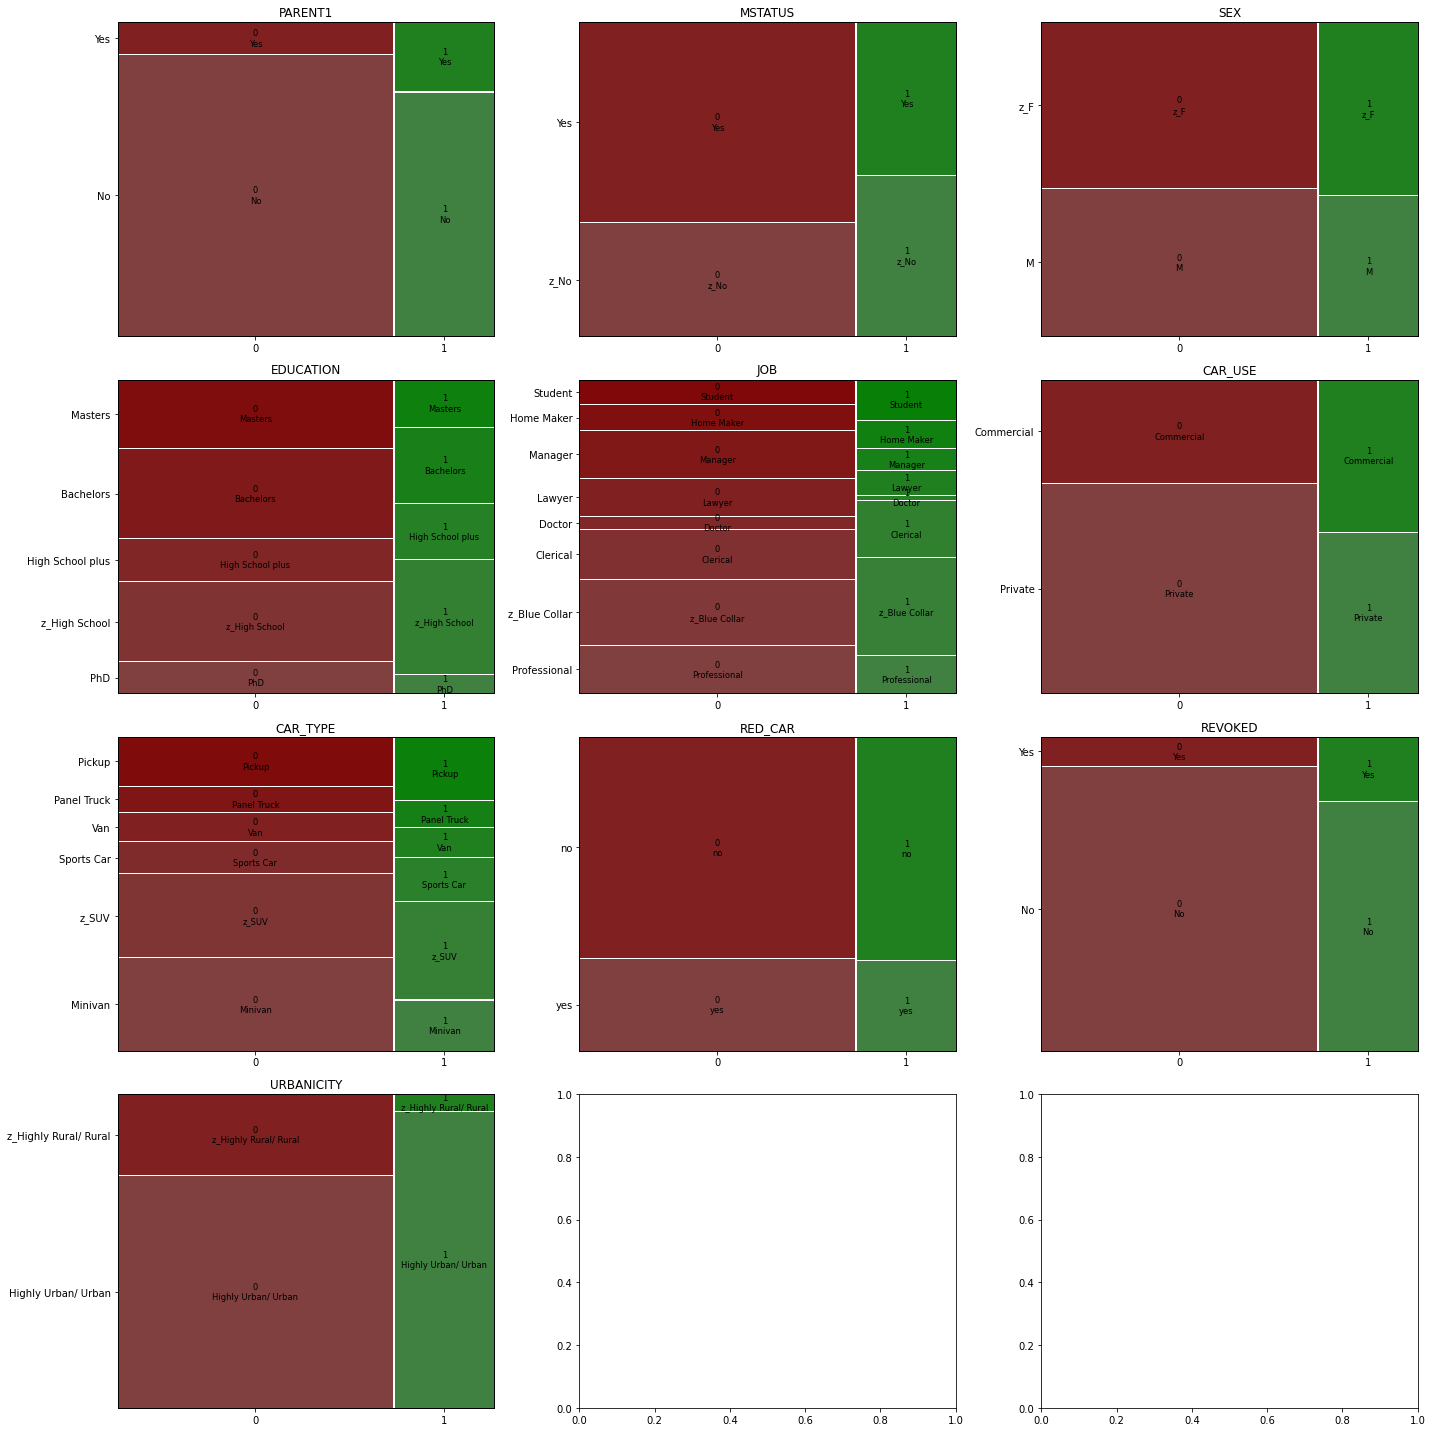

In [15]:
fig, axes = plt.subplots(4,3, figsize=(20, 20))
for i,name in enumerate(cat_features):
    mosaic(index=['TARGET_FLAG', name], data=df, ax=axes[i//3, i%3], title=name)
    
plt.tight_layout()

['MS_STATUS, 'CAR_USE', 'JOB', 'CAR_TYPE', 'URBANICITY'] have a clear impact on the target.

We will transform the values of the binary features to 0&1, also the nan in JOB feature can indicate that the client have no job, and we will replace the Nan values by 'nan' string.

In [17]:
for col in binary_features:
    df[col] = df[col].apply(lambda x: 0 if x==df[col].unique()[0] else 1)
    
df['JOB'].fillna('nan', inplace=True)


# Nan values imputation

We visualize the number of Nan in each column

<AxesSubplot:>

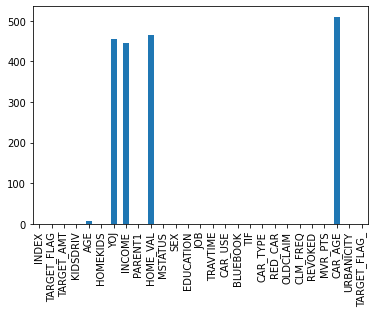

In [18]:
df.isnull().sum().plot.bar()

We can see there is an impact of the job on the income, we will impute tha nan values in INCOME by calculating the median of INCOM in each JOB group.

<AxesSubplot:xlabel='JOB', ylabel='INCOME'>

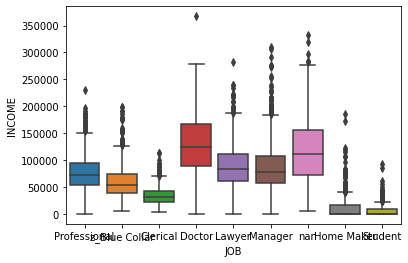

In [19]:
sns.boxplot(y='INCOME', x= 'JOB', data=df, orient='v')

There is a correlation between the HOME_VAL and INCOME (except the line in x=0 that I cannot predict), I suggest to implement imputation of HOME_VAL by regression on INCOME

<AxesSubplot:xlabel='INCOME', ylabel='HOME_VAL'>

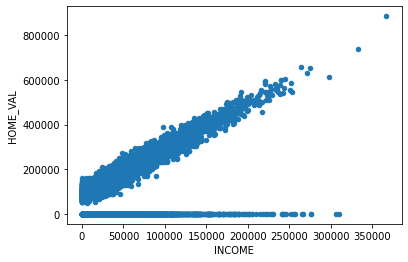

In [20]:
df[df['TARGET_FLAG']==0].plot.scatter(x='INCOME',y='HOME_VAL')

In [23]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

We implement a function 'data_processing' that do the following:
* impute AGE and YOJ and CAR_AGE by the median strategy
* impute the INCOME by the median of each group of jobs
* impute HOME_VAL by linear regression of INCOME
* Transform categorical columns to one-hot-encoding
* Implement RobustScaler on numerical features in order to apply SMOTE correctly,(because SMOTE use KNN)
* Use SMOTE to balance data

we mention that the above methods will be fitted on the train set and applied on the train and test sets, to prevent overfitting

In [24]:
def data_processing(X_train, y_train, X_test, y_test):
    #Imputation of AGE YOJ and CAR_AGE
    X_train['AGE'].fillna(X_train['AGE'].median(), inplace=True)
    X_test['AGE'].fillna(X_train['AGE'].median(), inplace=True)
    
    X_train['YOJ'].fillna(X_train['YOJ'].median(), inplace=True)
    X_test['YOJ'].fillna(X_train['YOJ'].median(), inplace=True)
    
    X_train['CAR_AGE'].fillna(X_train['CAR_AGE'].median(), inplace=True)
    X_test['CAR_AGE'].fillna(X_train['CAR_AGE'].median(), inplace=True)
    
    #Imputation of INCOME 
    for val in df['JOB'].unique():
        imp=X_train[X_train['JOB']==val]['INCOME'].median()
        X_train[X_train['JOB']==val]['INCOME'].fillna(imp, inplace=True)
        X_test[X_test['JOB']==val]['INCOME'].fillna(imp, inplace=True)

    #impute HOME_VAL by regression
    imp_mean = IterativeImputer(random_state=0)
    imp_mean.fit(df[['INCOME','HOME_VAL']])
    arr_train = imp_mean.transform(X_train[['INCOME','HOME_VAL']])
    arr_test = imp_mean.transform(X_test[['INCOME','HOME_VAL']])
    X_train['INCOME'], X_train['HOME_VAL'] = arr_train[:,0], arr_train[:,1]
    X_test['INCOME'], X_test['HOME_VAL'] = arr_test[:,0], arr_test[:,1]
    
    #Categorical to one-hot-encoding
    data= pd.concat([X_train, X_test])
    df_cat=pd.get_dummies(data[['EDUCATION', 'CAR_TYPE', 'JOB']])

    X_train = pd.concat([X_train[binary_features+num_features],
           df_cat.loc[list(X_train.index),:]],
          axis=1)
    X_test = pd.concat([X_test[binary_features+num_features],
           df_cat.loc[list(X_test.index),:]],
          axis=1)
    
    #Apply Scaler
    transformer = RobustScaler().fit(X_train[num_features])
    X_train[num_features]=transformer.transform(X_train[num_features])
    X_test[num_features]=transformer.transform(X_test[num_features])
    
    #Apply SMOTE
    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    return X_train, y_train, X_test, y_test


## classification model

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, balanced_accuracy_score, f1_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

Since xgboost is the most algorithm that provise good performance, we will use it here, but this model can not be interpretable, we can use logistic regression to have more explainability.

We will use the precision and recall to assesse the performance of the model. because the data is not balanced.

we use cross validation to calculate the metrics.

In [26]:
n_kf=5
data=df[features]
target=df['TARGET_FLAG']
param={'lambda': 0.0012091108621868488, 'alpha': 7.028973436530684, 'colsample_bytree': 1.0, 
 'subsample': 1.0, 'learning_rate': 0.012, 'n_estimators': 300, 'max_depth': 13, 'min_child_weight': 61}
kf = KFold(n_splits=n_kf,shuffle=True)
bas, f1, precision=0, 0, 0
confusion_mat = np.zeros((2,2))
for training_ids,test_ids in kf.split(data):
    train_x = data.loc[list(training_ids),:]
    train_y = target.loc[list(training_ids)]
    test_x = data.loc[list(test_ids),:]
    test_y = target.loc[list(test_ids)]

    train_x, train_y, test_x, test_y = data_processing(train_x, train_y, test_x, test_y)

    model = XGBClassifier(**param, objective='binary:hinge',
                          eval_metric='auc', use_label_encoder=False,
                         )  

    model.fit(train_x,train_y,
              #eval_set=[(test_x,test_y)],
              #early_stopping_rounds=100,
              verbose=False)

    preds = model.predict(test_x)

    bas = bas + balanced_accuracy_score(test_y, preds)
    f1 = f1 + f1_score(test_y, preds)
    precision = precision + precision_score(test_y, preds)
    confusion_mat+= confusion_matrix(test_y, preds, normalize='true')

print('confusion matrix : \n :',confusion_mat/5)
print('balanced accuracy :',bas/n_kf)
print('f1 score :',f1/n_kf)
print('precision :',precision/n_kf)


C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

confusion matrix : 
 : [[0.70560426 0.29439574]
 [0.25769196 0.74230804]]
balanced accuracy : 0.7239561504265357
f1 score : 0.578723907719399
precision : 0.4744681913350631


The balanced accuracy is 0.72, precision=0.48, recall =0.72 and f1 = 0.57

We can use the xgb model to rank the importance of the features, this helps to select the (probably) relevant features and use them in another model.

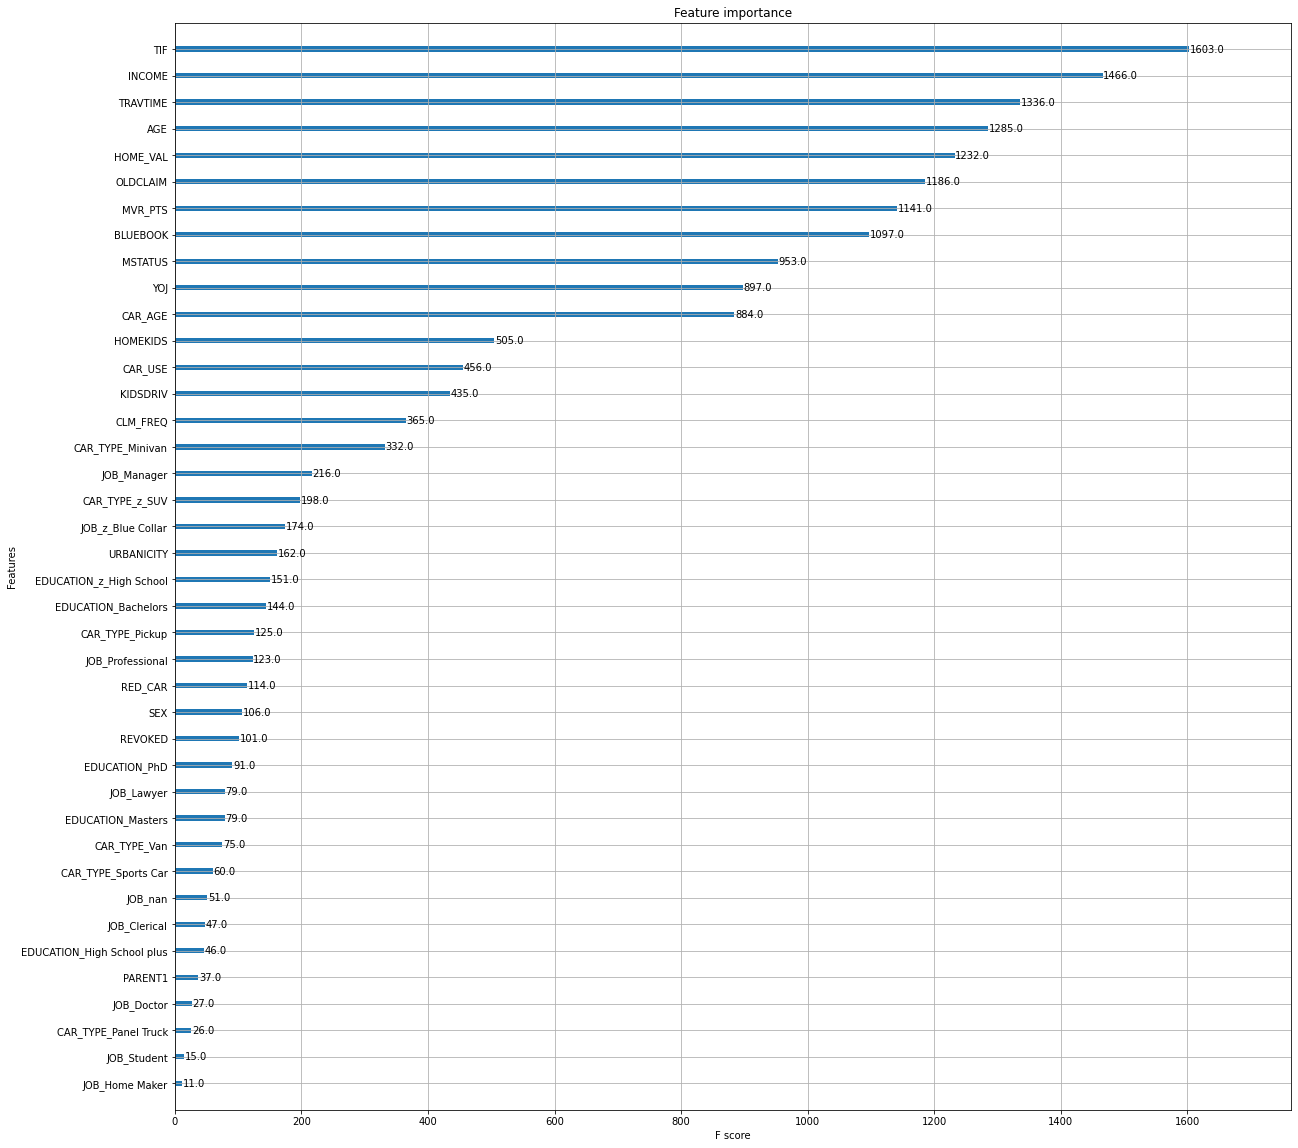

In [27]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [28]:
features_encoded = ['SEX', 'RED_CAR', 'CAR_USE', 'URBANICITY', 'MSTATUS', 'REVOKED',
       'PARENT1', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL',
       'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS',
       'CAR_AGE', 'EDUCATION_High School plus',
       'EDUCATION_Bachelors', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'EDUCATION_z_High School', 'CAR_TYPE_Minivan', 'CAR_TYPE_Panel Truck',
       'CAR_TYPE_Pickup', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van',
       'CAR_TYPE_z_SUV', 'JOB_Clerical', 'JOB_Doctor', 'JOB_Home Maker',
       'JOB_Lawyer', 'JOB_Manager', 'JOB_Professional', 'JOB_Student',
       'JOB_nan', 'JOB_z_Blue Collar']

features_to_drop = ['CAR_TYPE_Panel Truck', 'CAR_TYPE_Sports Car', 'JOB_nan', 'JOB_Student', 'JOB_Home Maker',
                   'EDUCATION_High School plus', 'PARENT1', 'EDUCATION_PhD', 'CAR_TYPE_Van', 'CAR_TYPE_z_SUV',
                   'JOB_Clerical', 'JOB_Lawyer', 'SEX']

selected_features = list(set(features_encoded)- set(features_to_drop))

Perform the model with the selected features

In [29]:
data=df[features]
target=df['TARGET_FLAG']
param={'lambda': 0.001, 'alpha': 7.0, 'colsample_bytree': 1.0, 
 'subsample': 1.0, 'learning_rate': 0.012, 'n_estimators': 300, 'max_depth': 13, 'min_child_weight': 61}
kf = KFold(n_splits=n_kf,shuffle=True)
bas, f1, precision=0, 0, 0
confusion_mat = np.zeros((2,2))
for training_ids,test_ids in kf.split(data):
    train_x = data.loc[list(training_ids),:]
    train_y = target.loc[list(training_ids)]
    test_x = data.loc[list(test_ids),:]
    test_y = target.loc[list(test_ids)]

    train_x, train_y, test_x, test_y = data_processing(train_x, train_y, test_x, test_y)

    model = XGBClassifier(**param, objective='binary:hinge',
                          eval_metric='auc', use_label_encoder=False,
                         )  

    model.fit(train_x[selected_features],train_y,
              #eval_set=[(test_x,test_y)],
              #early_stopping_rounds=100,
              verbose=False)

    preds = model.predict(test_x[selected_features])

    bas = bas + balanced_accuracy_score(test_y, preds)
    f1 = f1 + f1_score(test_y, preds)
    precision = precision + precision_score(test_y, preds)
    confusion_mat+= confusion_matrix(test_y, preds, normalize='true')

print('confusion matrix : \n :',confusion_mat/5)
print('balanced accuracy :',bas/n_kf)
print('f1 score :',f1/n_kf)
print('precision :',precision/n_kf)


C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

confusion matrix : 
 : [[0.71161133 0.28838867]
 [0.26190566 0.73809434]]
balanced accuracy : 0.7248528358156566
f1 score : 0.5802501097638169
precision : 0.4786828830614379


We can see that there is no big improvement in the metrics, we can perform hyper-optimization to find the best params.

FINAL classifier model:

In [30]:
from sklearn.model_selection import train_test_split
data=df[features]
target=df['TARGET_FLAG']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)
train_x, train_y, test_x, test_y = data_processing(X_train, y_train, X_test, y_test)
model_classifier = XGBClassifier(**param, objective='binary:hinge',
                      eval_metric='auc', use_label_encoder=False,
                     )  

model_classifier.fit(train_x[selected_features],train_y,
          eval_set=[(test_x[selected_features],test_y)],
          early_stopping_rounds=100,
          verbose=False)


C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

XGBClassifier(alpha=7.0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='', lambda=0.001,
              learning_rate=0.012, max_delta_step=0, max_depth=13,
              min_child_weight=61, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=16, num_parallel_tree=1,
              objective='binary:hinge', predictor='auto', random_state=0,
              reg_alpha=7, reg_lambda=0.00100000005, scale_pos_weight=None,
              subsample=1.0, tree_method='exact', ...)

# Regression Model

First, we isolate the data when TARGET_FLAG=1, and filter the rows of TARGET_AMT>10000

In [31]:
df_1=df[(df['TARGET_AMT']!=0) & (df['TARGET_AMT']<10000)].reset_index()

There is no clear effect of the categorical variables on the target amt, only JOB, EDUCATION and CAR_TYPE have some effects.

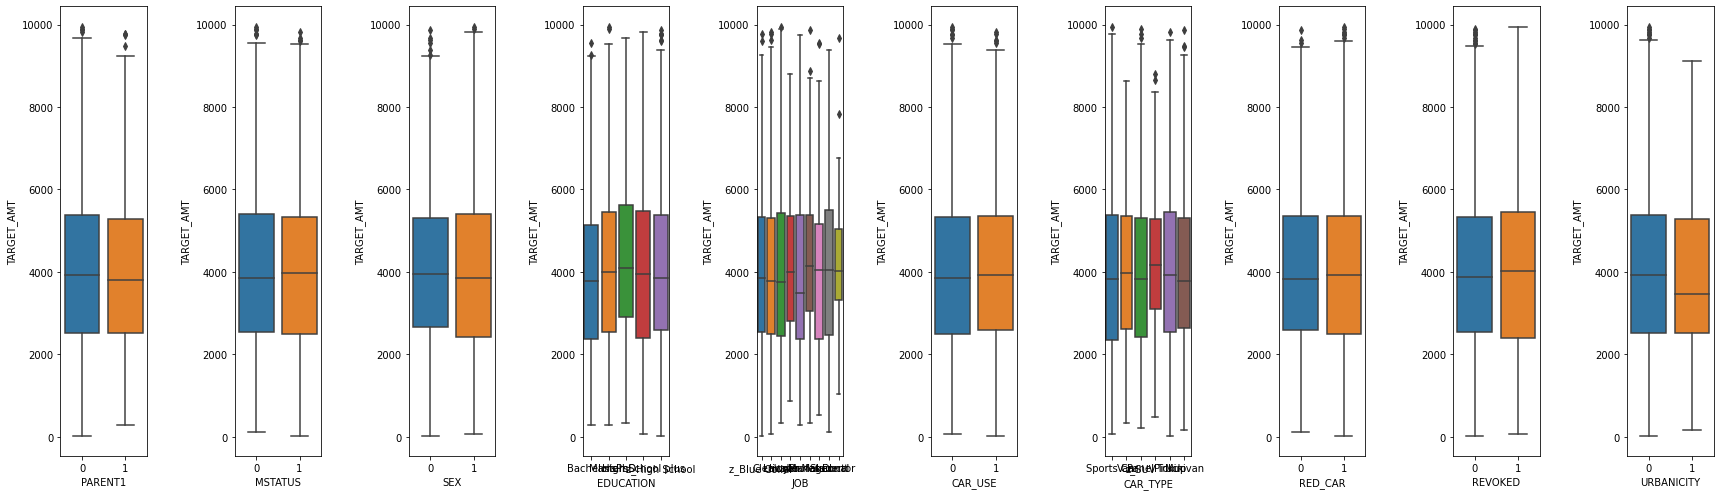

In [32]:
fig, axes = plt.subplots(1,10, figsize=(24, 7))

for name, ax in zip(cat_features, axes.flatten()):
    sns.boxplot(y='TARGET_AMT', x= name, data=df_1, orient='v', ax=ax)
    
plt.tight_layout()

In [33]:
df_1[num_features+['TARGET_AMT']].corr()['TARGET_AMT'].sort_values()

TRAVTIME     -0.010746
YOJ          -0.008560
KIDSDRIV     -0.005908
CLM_FREQ     -0.001961
INCOME       -0.001154
AGE           0.002750
HOMEKIDS      0.005986
TIF           0.007906
OLDCLAIM      0.011430
CAR_AGE       0.012799
BLUEBOOK      0.015043
HOME_VAL      0.017449
MVR_PTS       0.044440
TARGET_AMT    1.000000
Name: TARGET_AMT, dtype: float64

<AxesSubplot:>

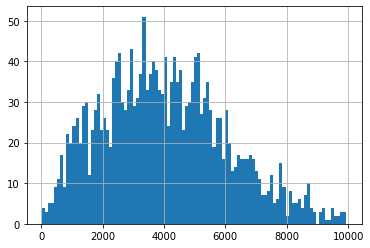

In [34]:
df_1['TARGET_AMT'].hist(bins=100)

also the numerical variables are not highly correlated wit the target

We will define this time a function to process the train and test data as above

In [35]:
def data_processing_reg(X_train, X_test):
    X_train['AGE'].fillna(X_train['AGE'].median(), inplace=True)
    X_test['AGE'].fillna(X_train['AGE'].median(), inplace=True)
    
    X_train['YOJ'].fillna(X_train['YOJ'].median(), inplace=True)
    X_test['YOJ'].fillna(X_train['YOJ'].median(), inplace=True)
    
    X_train['CAR_AGE'].fillna(X_train['CAR_AGE'].median(), inplace=True)
    X_test['CAR_AGE'].fillna(X_train['CAR_AGE'].median(), inplace=True)

    for val in df['JOB'].unique():
        imp=X_train[X_train['JOB']==val]['INCOME'].median()
        X_train[X_train['JOB']==val]['INCOME'].fillna(imp, inplace=True)
        X_test[X_test['JOB']==val]['INCOME'].fillna(imp, inplace=True)

    #impute INCOME and HOME_VALE by regression
    imp_mean = IterativeImputer(random_state=0)
    imp_mean.fit(X_train[['INCOME','HOME_VAL']])
    arr_train = imp_mean.transform(X_train[['INCOME','HOME_VAL']])
    arr_test = imp_mean.transform(X_test[['INCOME','HOME_VAL']])
    X_train['INCOME'], X_train['HOME_VAL'] = arr_train[:,0], arr_train[:,1]
    X_test['INCOME'], X_test['HOME_VAL'] = arr_test[:,0], arr_test[:,1]
    
    data= pd.concat([X_train, X_test])
    df_cat=pd.get_dummies(data[['EDUCATION', 'CAR_TYPE', 'JOB']])

    X_train = pd.concat([X_train[binary_features+num_features],
           df_cat.loc[list(X_train.index),:]],
          axis=1)
    X_test = pd.concat([X_test[binary_features+num_features],
           df_cat.loc[list(X_test.index),:]],
          axis=1)
    
    return X_train, X_test

we will use the mean absolute percentage error as a metric, because the relative error is more significant than the absolute error

In [36]:
def mape_score(
    y_true, y_pred):
    
    epsilon = np.finfo(np.float64).eps
    mape = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), epsilon)
    output_errors = np.average(mape, axis=0)

    return np.average(output_errors)


In [37]:
data = df_1[features]
target = df_1['TARGET_AMT']

param={'lambda': 5.871674665490502, 'alpha': 1.1623136801264236, 'colsample_bytree': 0.6, 'subsample': 0.7,
       'learning_rate': 0.008, 'n_estimators': 300, 'max_depth': 4, 'min_child_weight': 155}

kf = KFold(n_splits=n_kf,shuffle=True)
bas=0
confusion_mat = np.zeros((2,2))
for training_ids,test_ids in kf.split(data):
    train_x = data.loc[list(training_ids),:]
    train_y = target.loc[list(training_ids)]
    test_x = data.loc[list(test_ids),:]
    test_y = target.loc[list(test_ids)]

    train_x, test_x= data_processing_reg(train_x, test_x)
    model = XGBRegressor(**param, objective='reg:squarederror',
                          eval_metric='mape', use_label_encoder=False,
                         )  

    model.fit(train_x,train_y,
              #eval_set=[(test_x,test_y)],
              #early_stopping_rounds=100,
              verbose=False)

    preds = model.predict(test_x)

    bas = bas + mape_score(test_y, preds)

print(bas/n_kf)

C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

0.8152290770037764


the mape is 0.81 that means the model will predict badly the target with an error +-80% of the target value.

This is the histogram of the error made by the model

<AxesSubplot:>

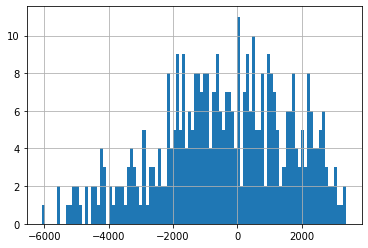

In [38]:
(preds-test_y).hist(bins=100)

We can use the feature selection method:

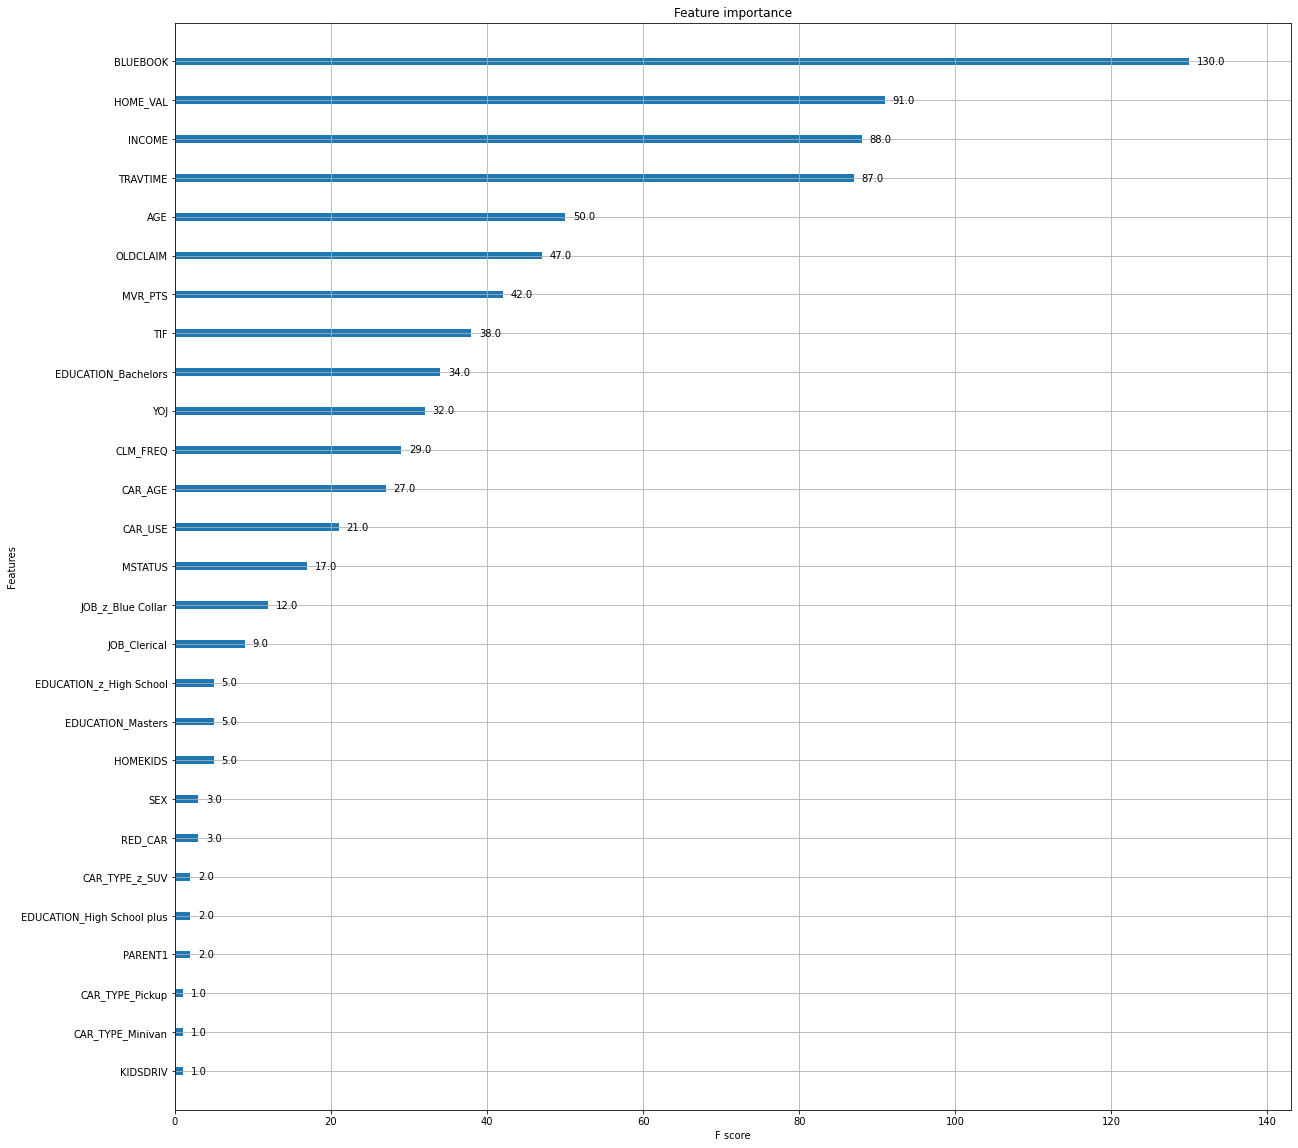

In [39]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
data=df[features]
target=df['TARGET_AMT']

X_train, X_test, train_y, test_y = train_test_split(data, target, test_size=0.1, random_state=42)
train_x, test_x= data_processing_reg(X_train, X_test)
model_regressor = XGBRegressor(**param, objective='reg:squarederror',
                          eval_metric='mape', use_label_encoder=False,
                         )  

model_regressor.fit(train_x,train_y,
          verbose=False)

C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

XGBRegressor(alpha=1.1623136801264236, base_score=0.5, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             enable_categorical=False, eval_metric='mape', gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             lambda=5.871674665490502, learning_rate=0.008, max_delta_step=0,
             max_depth=4, min_child_weight=155, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1.1623137, reg_lambda=5.87167454, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', use_label_encoder=False, ...)

# Final model

In [41]:
def data_processing(X_train, X_test):
    #Imputation of AGE YOJ and CAR_AGE
    X_test['AGE'].fillna(X_train['AGE'].median(), inplace=True)
    
    X_test['YOJ'].fillna(X_train['YOJ'].median(), inplace=True)
    
    X_test['CAR_AGE'].fillna(X_train['CAR_AGE'].median(), inplace=True)
    
    #Imputation of INCOME 
    for val in df['JOB'].unique():
        imp=X_train[X_train['JOB']==val]['INCOME'].median()
        X_test[X_test['JOB']==val]['INCOME'].fillna(imp, inplace=True)

    #impute HOME_VAL by regression
    imp_mean = IterativeImputer(random_state=0)
    imp_mean.fit(df[['INCOME','HOME_VAL']])
    arr_test = imp_mean.transform(X_test[['INCOME','HOME_VAL']])
    X_test['INCOME'], X_test['HOME_VAL'] = arr_test[:,0], arr_test[:,1]
    
    #Categorical to one-hot-encoding
    test_cat=pd.get_dummies(X_test[['EDUCATION', 'CAR_TYPE', 'JOB']])

    X_test = pd.concat([X_test[binary_features+num_features],
           test_cat],
          axis=1)
    
    #Apply Scaler
    transformer = RobustScaler().fit(X_train[num_features])
    X_train[num_features]=transformer.transform(X_train[num_features])
    X_test[num_features]=transformer.transform(X_test[num_features])
    
    return X_test


In [43]:
df_test=pd.read_csv('test_auto.csv')

obj_columns = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']
def str_to_mun(string):
    if type(string)==str:
        return float(string.replace('$','').replace(',',''))
    else:
        return string

for col in obj_columns:
    df_test[col] = df_test[col].apply(str_to_mun)
    

#We rename the value '<High School' in df
df_test.replace(to_replace='<High School', value='High School plus', inplace=True)

for col in binary_features:
    df_test[col] = df_test[col].apply(lambda x: 0 if x==df_test[col].unique()[0] else 1)
    
df_test['JOB'].fillna('nan', inplace=True)

In [44]:
X_train = df[features]
def final_model(X):
    X_test = X[features]
    test_x= data_processing(X_train, X_test)
    X['TARGET_AMT']=model_regressor.predict(test_x)
    X['TARGET_FLAG']=model_classifier.predict(test_x[selected_features])
    X.loc[X['TARGET_FLAG']==0,'TARGET_AMT']=[0 for i in range(len(X[X['TARGET_FLAG']==0]))]
    return X[['INDEX','TARGET_FLAG','TARGET_AMT']]

In [45]:
output=final_model(df_test)

C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\a-bensghir\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [46]:
output.to_csv('test_results.csv')

In [47]:
output

,INDEX,TARGET_FLAG,TARGET_AMT
0,3,0,0.000000
1,9,1,1820.997192
2,10,0,0.000000
3,18,0,0.000000
4,21,0,0.000000
...,...,...,...
2136,10279,1,997.524353
2137,10281,0,0.000000
2138,10285,0,0.000000
2139,10294,1,2122.425293
